In [10]:
import fcn32_vgg 
import numpy as np
import tensorflow as tf
import skimage.io
import skimage.transform
import utils
import scipy as scp
import scipy.misc
import loss
import pandas as pd
from tensorflow.python.framework import ops
from skimage.color.adapt_rgb import adapt_rgb
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
img1 = skimage.io.imread("./test_data/7_70.tif")

In [12]:
def to_rgb(img):
    return np.dstack((img,img,img))

In [13]:
rgb1 = to_rgb(img1)

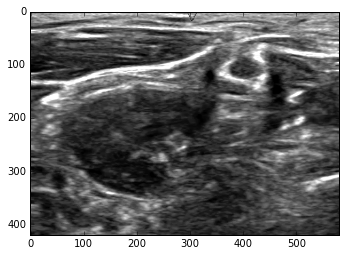

In [9]:
plt.imshow(rgb1)

In [14]:
sess=tf.InteractiveSession()
labels= tf.placeholder(tf.float32,[None,420,580,3])
batch_images = tf.placeholder(tf.float32,[None,420,580,3])
net = fcn32_vgg.FCN32VGG()
with tf.name_scope("content_vgg"):
        net.build(batch_images, num_classes=2,debug=False)

print('Finished building Network.')

npy file loaded
Layer name: conv1_1
Layer shape: (3, 3, 3, 64)
Layer name: conv1_2
Layer shape: (3, 3, 64, 64)
Layer name: conv2_1
Layer shape: (3, 3, 64, 128)
Layer name: conv2_2
Layer shape: (3, 3, 128, 128)
Layer name: conv3_1
Layer shape: (3, 3, 128, 256)
Layer name: conv3_2
Layer shape: (3, 3, 256, 256)
Layer name: conv3_3
Layer shape: (3, 3, 256, 256)
Layer name: conv4_1
Layer shape: (3, 3, 256, 512)
Layer name: conv4_2
Layer shape: (3, 3, 512, 512)
Layer name: conv4_3
Layer shape: (3, 3, 512, 512)
Layer name: conv5_1
Layer shape: (3, 3, 512, 512)
Layer name: conv5_2
Layer shape: (3, 3, 512, 512)
Layer name: conv5_3
Layer shape: (3, 3, 512, 512)
Layer name: fc6
Layer shape: [7, 7, 512, 4096]
Layer name: fc7
Layer shape: [1, 1, 4096, 4096]
Layer name: fc8
Layer shape: [1, 1, 4096, 1000]
Finished building Network.


In [15]:
init = tf.initialize_all_variables()
sess.run(tf.initialize_all_variables())

In [10]:
cost_function = loss.loss(prediction,labels,2)

In [11]:
train_step = tf.train.AdamOptimizer(1e-6).minimize(cost_function)

In [12]:
####### the data

In [13]:
training = pd.read_msgpack('/Users/gus/CDIPS/uns/training.bin')
non_empty_training = training[~training.maskC.isnull()]
non_empty_training.index=np.arange(len(non_empty_training))

In [32]:
pixelsOut =sess.run(prediction,feed_dict={batch_images:np.array([img1])})

In [20]:
### training loop

In [21]:
def build_batch():
    pass

In [38]:
def train_network(num_batches,update_period=50,metric=None):
    
    for i in range(num_batches):
        batch= build_batch()
        if i%update_period ==0:
            pass
        #train_error = metric.eval(feed_dict={
        #batch_images:batch[0], y_: batch[1]})
        #print ('RMS error on training batch'+str(i)+ ':'+str(train_error))
        train_step.run(feed_dict={batch_images:batch[0],labels:batch[1]})